In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import unary_union


#### 1. Select the reserviors in hma from global dataset by location.


In [2]:
path_hma = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_reservoirs = 'data/reservoirs/GDW_reservoirs_v1_0.gpkg' 
path_reservoirs_hma = 'data/reservoirs/GDW_reservoirs_v1_0_hma.gpkg'


In [3]:
## Read data
global_reservoirs = gpd.read_file(path_reservoirs)
hma_gpd = gpd.read_file(path_hma)
print(global_reservoirs.shape)
global_reservoirs.head(2)


(35295, 72)


,GDW_ID,RES_NAME,DAM_NAME,ALT_NAME,DAM_TYPE,LAKE_CTRL,RIVER,ALT_RIVER,MAIN_BASIN,SUB_BASIN,...,LONG_DAM,LAT_DAM,ORIG_SRC,POLY_SRC,GRAND_ID,HYRIV_ID,INSTREAM,HYLAK_ID,HYBAS_L12,geometry
0,1,Lake Winnipeg,Jenpeg,Split Lake,Lake Control Dam,Yes,Nelson,None,None,None,...,0.0,0.0,GRanD,CanVec,709,70125969,Instream,4,7120921060,"MULTIPOLYGON (((-98.80636 53.88021, -98.80578 ..."
1,2,Ontario,Iroquois,None,Lake Control Dam,Yes,St. Lawrence,None,None,None,...,0.0,0.0,GRanD,SWBD,1485,70444883,Instream,7,7121021260,"MULTIPOLYGON (((-79.09167 43.81213, -79.09133 ..."


In [4]:
## select the reserviors in the hma region
poly_hma = unary_union(hma_gpd['geometry'])
reservoirs_id = np.where(poly_hma.contains(global_reservoirs['geometry'].centroid) == True)[0]
hma_reservoirs = global_reservoirs.iloc[reservoirs_id] 
hma_reservoirs = hma_reservoirs.reset_index()
del hma_reservoirs['index']
print(hma_reservoirs.shape)


(485, 72)


Text(0.5, 1.0, 'hma reservoirs')

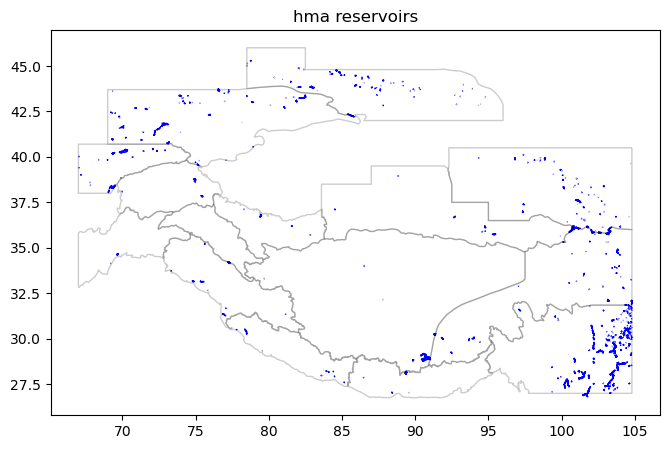

In [5]:
### Visualization
fig, ax = plt.subplots(1,1, figsize=(8,5))
hma_reservoirs.plot(color='red', ax=ax, edgecolor='blue', linewidth=1)
hma_gpd.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.2)
ax.set_title('hma reservoirs')


In [6]:
# # ### Write out
# hma_reservoirs.to_file(path_reservoirs_hma, driver='GPKG')
